In [55]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [56]:
#loading the data into dataframe
df = pd.read_csv('Telco_Customer_Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [57]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [59]:
#replacing empty strings in the 'TotalCharges' column
df['TotalCharges'] = df['TotalCharges'].replace(" ", pd.NA)

#converting the column to column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

df.groupby('Churn')['TotalCharges'].mean()

Churn
No     2555.344141
Yes    1531.796094
Name: TotalCharges, dtype: float64

Non-churners pay more in monthly charges as compared to Churners

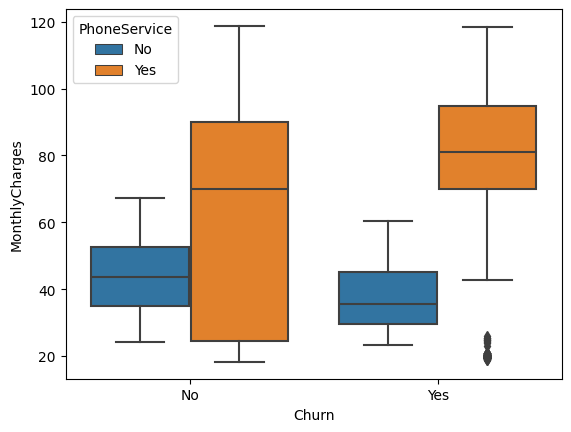

In [60]:
#visualizing the difference in Monthly charges between churners and non-churners
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue='PhoneService')
plt.show()

Churners who have phone service also pay the most Monthly charges

In [61]:
df.groupby('Churn')['SeniorCitizen'].mean()

Churn
No     0.128721
Yes    0.254682
Name: SeniorCitizen, dtype: float64

Encoding 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling' and 'Churn'

In [87]:
#import numpy as np
selected_columns = [2, 3, 4, 6, 7, 8, 11, 12, 16]  # Indices of the desired columns

# Create the array X containing the selected columns

#Features and Labels
X = df.iloc[:, selected_columns].values
y = df.iloc[:,20].values #churn

#Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder

# Create a label encoder for each categorical column
label_encoders = []
for i in range(len(selected_columns)):
   if pd.api.types.is_categorical_dtype(df.iloc[:, selected_columns[i]]):
        label_encoders.append(LabelEncoder())

# Fit the label encoders to the data
for i in range(len(label_encoders)):
   label_encoders[i].fit(X[:, i])

# Transform the data using the label encoders
for i in range(len(label_encoders)):
    X[:, i] = label_encoders[i].transform(X[:, i])


#Encoding categorical data in y
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

y

array([0, 0, 1, ..., 0, 1, 0])

In [88]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [89]:
#removing the extra column to avoid a dummy variable trap
columns = X_State = pd.get_dummies(X[:, 0], drop_first=True)

#converting X to a dataframe
X = pd.DataFrame(X)

#dropping the 'State' column
X = X.drop([0], axis=1)

#merging the dataframes
frames = [X_State, X]
result = pd.concat(frames, axis=1, ignore_index=True)

X = result



In [90]:
X

,0,1,2,3,4,5,6,7,8
0,False,Yes,No,No,No phone service,DSL,No,No,Yes
1,False,No,No,Yes,No,DSL,Yes,No,No
2,False,No,No,Yes,No,DSL,No,No,Yes
3,False,No,No,No,No phone service,DSL,Yes,Yes,No
4,False,No,No,Yes,No,Fiber optic,No,No,Yes
...,...,...,...,...,...,...,...,...,...
7038,False,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes
7039,False,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes
7040,False,Yes,Yes,No,No phone service,DSL,No,No,Yes
7041,True,Yes,No,Yes,Yes,Fiber optic,No,No,Yes


In [91]:
#defining a mapping dictionary for binary conversion
binary_mapping = {'No': 0, 'Yes': 1, True: 1, False: 0, 'No phone service': 0, 'No internet service': 0, 'DSL': 1, 'Fiber optic': 1}

#applying the mapping to columns
X = X.applymap(lambda x: binary_mapping.get(x, x))

In [92]:
# Use pd.get_dummies to convert categorical values to binary
#X = pd.get_dummies(X, columns=[1, 2, 3, 4], drop_first=True)

# Convert 'False' to 0 and 'True' to 1 in column 0
#X[0] = X[0].astype(int)

In [93]:
X

,0,1,2,3,4,5,6,7,8
0,0,1,0,0,0,1,0,0,1
1,0,0,0,1,0,1,1,0,0
2,0,0,0,1,0,1,0,0,1
3,0,0,0,0,0,1,1,1,0
4,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,1,1,1,1
7039,0,1,1,1,1,1,1,0,1
7040,0,1,1,0,0,1,0,0,1
7041,1,1,0,1,1,1,0,0,1


In [94]:
#spliting the dataset into the Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                  random_state=20)

In [95]:
#feature scaling
from sklearn.preprocessing import StandardScaler

#creating a standardscaler object
sc = StandardScaler()

#scaling the training set
X_train = sc.fit_transform(X_train)

#scaling the test set
X_test = sc.transform(X_test)

# RANDOM FOREST

In [96]:
from sklearn.ensemble import RandomForestClassifier

#instantiating the classifier
clf = RandomForestClassifier()

#fitting it to the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [97]:
#predicting the labels for the test set
y_prediction = clf.predict(X_test)

In [98]:
#evaluating model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy:", accuracy_score(y_test, y_prediction))

Accuracy: 0.7721788502484032


In [99]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_prediction))

[[946 117]
 [204 142]]


In [100]:
print("Precision:", precision_score(y_test,
									y_prediction,
									average="weighted"))

print('Recall:', recall_score(y_test,
							y_prediction ,
							average="weighted"))

Precision: 0.7552390952286037
Recall: 0.7721788502484032


# DECISION TREE

In [101]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)


In [102]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7764371894960965


In [103]:
print("Precision:", precision_score(y_test,
									y_pred,
									average="weighted"))

print('Recall:', recall_score(y_test,
							y_pred,
							average="weighted"))


Precision: 0.7588249277192508
Recall: 0.7764371894960965
